# Linear Regression - Intraday Data

## 1) Simple Linear Regression

In [3]:
# from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error# Hide warnings
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [4]:

# Read data
dataset = pd.read_parquet('../data/us_equity/taq_min/AAPL.parquet')

# Only keep close columns
dataset.head()

,,TradeDate,SecId,OpenBarTimeOffset,OpenBidPrice,OpenBidSize,OpenAskPrice,OpenAskSize,FirstTradeTimeOffset,FirstTradePrice,FirstTradeSize,...,FinraVolumeWeightPrice,UptickVolume,DowntickVolume,RepeatUptickVolume,RepeatDowntickVolume,UnknownTickVolume,TradeToMidVolWeight,TradeToMidVolWeightRelative,TimeWeightBid,TimeWeightAsk
BarDateTime,Ticker,,,,,,,,,,,,,,,,,,,,,
2015-05-01 04:00:00-04:00,AAPL,2015-05-01,0,0,0.00,0,0.00,0,0E-9,0.0,0,...,0.00000,0,0,0,0,0,0.00000,0.00000,124.51000,125.67000
2015-05-01 04:01:00-04:00,AAPL,2015-05-01,0,0,124.51,100,125.67,100,0E-9,0.0,0,...,0.00000,0,0,0,0,0,0.00000,0.00000,125.21000,125.67000
2015-05-01 04:02:00-04:00,AAPL,2015-05-01,0,0,125.21,100,125.67,100,0E-9,0.0,0,...,0.00000,0,0,0,0,0,0.00000,0.00000,125.21000,125.67000
2015-05-01 04:03:00-04:00,AAPL,2015-05-01,0,0,125.21,100,125.67,100,0E-9,0.0,0,...,0.00000,0,0,0,0,0,0.00000,0.00000,125.21000,125.67000
2015-05-01 04:04:00-04:00,AAPL,2015-05-01,0,0,125.21,100,125.67,100,0E-9,0.0,0,...,0.00000,0,0,0,0,0,0.00000,0.00000,125.21000,125.67000


In [7]:
dataset = dataset.swaplevel(1,0)

In [8]:
dataset=dataset.astype({'OpenBidPrice': 'float64',
'OpenAskPrice': 'float64',
'FirstTradePrice': 'float64',
'HighBidPrice': 'float64',
'HighAskPrice': 'float64',
'HighTradePrice': 'float64',
'LowBidPrice': 'float64',
'LowAskPrice': 'float64',
'LowTradePrice': 'float64',
'CloseBidPrice': 'float64',
'CloseAskPrice': 'float64',
'LastTradePrice': 'float64',
'MinSpread': 'float64',
'MaxSpread': 'float64',
'VolumeWeightPrice': 'float64',
'FinraVolumeWeightPrice': 'float64',
'TradeToMidVolWeight': 'float64',
'TradeToMidVolWeightRelative': 'float64',
'TimeWeightBid': 'float64',
'TimeWeightAsk': 'float64'})

In [9]:
dataset=dataset.dropna()

In [10]:
dataset.shape

(2482081, 60)

<AxesSubplot:xlabel='LastTradePrice', ylabel='Density'>

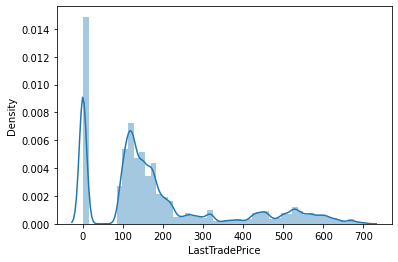

In [11]:
import seaborn as sns
sns.distplot(dataset['LastTradePrice'])

<AxesSubplot:>

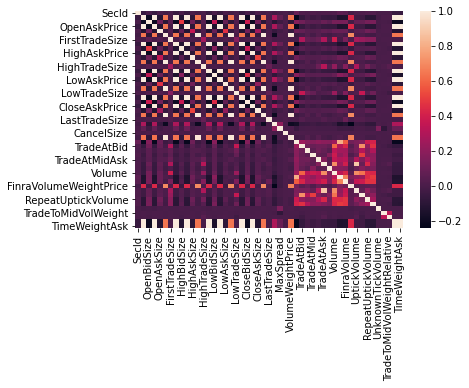

In [12]:
sns.heatmap(dataset.corr())

In [15]:

# Creating train test split
X = dataset.drop(columns=['LastTradePrice', 'TradeDate'])
y = dataset['LastTradePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.4, random_state=101)

In [16]:

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
print(lm.intercept_)


-739.7462423370421


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns={'Coefficient'})
coeff_df

,Coefficient
SecId,9.037003e-08
OpenBarTimeOffset,9.850572e+02
OpenBidPrice,-4.864653e-02
OpenBidSize,-1.169581e-06
OpenAskPrice,4.847636e-02
OpenAskSize,-1.537173e-08
FirstTradeTimeOffset,-4.799681e-04
FirstTradePrice,2.278794e-01
FirstTradeSize,1.682841e-08
HighBidTimeOffset,1.615699e-05


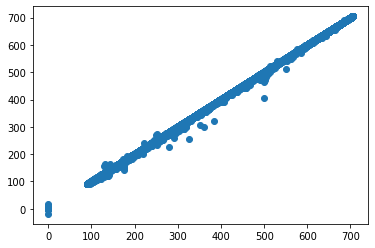

In [19]:
import matplotlib.pyplot as plt
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='LastTradePrice', ylabel='Density'>

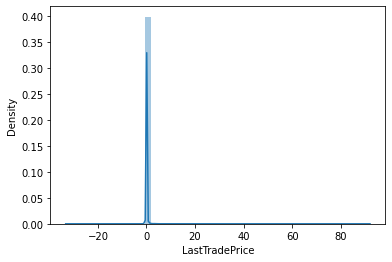

In [20]:
sns.distplot((y_test-predictions),bins=50)

In [22]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.04825815740728042
MSE: 0.08564444063469229
RMSE: 0.29265071439293


## 3) Lasso

## 4) Lars

## 5) LassoLars

## 6) Adaboost

## 7) PyTorch Linear Regression

In [30]:
%pip install torch

You are using pip version 19.0.3, however version 22.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/e2/94/6d8ff9dab8b9b88efd233890c4e494cc1084268e06b7791af440be5a8f6b/torch-1.12.0-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.3, however version 22.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.3, however version 22.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
import torch
import torch.nn as nn

X = torch.Tensor(dataset[['FirstTradePrice']].values)
y = torch.Tensor(dataset[['LastTradePrice']].values)

In [32]:
x_train = np.array(X, dtype=np.float32)
x_train.shape

(2482081, 1)

In [33]:
y_train = np.array(y, dtype=np.float32)
y_train.shape

(2482081, 1)

In [34]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [35]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [36]:
criterion = nn.MSELoss()


In [37]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [38]:
epochs = 100


In [39]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 140929.515625
epoch 2, loss 247286628352.0
epoch 3, loss 4.3395311894685286e+17
epoch 4, loss 7.602418444573077e+23
epoch 5, loss 1.331573610750445e+30
epoch 6, loss inf
epoch 7, loss inf
epoch 8, loss inf
epoch 9, loss inf
epoch 10, loss inf
epoch 11, loss inf
epoch 12, loss inf
epoch 13, loss nan
epoch 14, loss nan
epoch 15, loss nan
epoch 16, loss nan
epoch 17, loss nan
epoch 18, loss nan
epoch 19, loss nan
epoch 20, loss nan
epoch 21, loss nan
epoch 22, loss nan
epoch 23, loss nan
epoch 24, loss nan
epoch 25, loss nan
epoch 26, loss nan
epoch 27, loss nan
epoch 28, loss nan
epoch 29, loss nan
epoch 30, loss nan
epoch 31, loss nan
epoch 32, loss nan
epoch 33, loss nan
epoch 34, loss nan
epoch 35, loss nan
epoch 36, loss nan
epoch 37, loss nan
epoch 38, loss nan
epoch 39, loss nan
epoch 40, loss nan
epoch 41, loss nan
epoch 42, loss nan
epoch 43, loss nan
epoch 44, loss nan
epoch 45, loss nan
epoch 46, loss nan
epoch 47, loss nan
epoch 48, loss nan
epoch 49, loss nan
ep

In [40]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [41]:
y_train


array([[  0.  ],
       [  0.  ],
       [  0.  ],
       ...,
       [135.67],
       [135.64],
       [135.62]], dtype=float32)

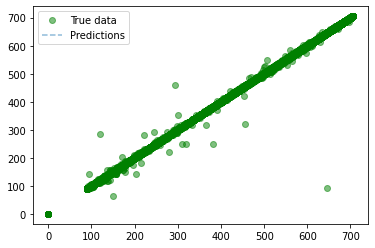

In [42]:
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [43]:
y_pred = model(torch.tensor([[22.290001]], dtype=torch.float32)).detach()
y_pred.item()

nan